In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("Data/loan.csv")
shape = df.shape
print("Shape of the dataset is: ", shape)
df.head()

Shape of the dataset is:  (39717, 111)


C:\Users\Sameer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- There are 111 columns in the given dataset

## 1. Data Cleaning

In [3]:
##find columns with 100% missing values
missing = 100*(df.isnull().sum()/df.shape[0]).to_frame()
missing = missing[missing[0]==100]
missing.shape

(54, 1)

In [4]:
## names of above 54 columns
list(missing.index)

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [5]:
#drop the above columns
df.drop(columns=list(missing.index),inplace=True)

In [6]:
#remaining columns
len(df.columns)

57

- We are now left with 57 columns after dropping 54 of columns with no data

In [7]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


### Dropping below columns:
- Cannot predict next_payment_date, so it's better to drop the column which has 97.129693% of missing data
- Months since last record, this field has 92.985372% of missing data. We do not know what NA means here. So dropping it.
- mths_since_last_delinq has 65% of missing data, and this field isn't that relevant to work with only 35% available data.
- desc, its just description/reason for the loan.
- emp_title is not relevant here so dropping it

In [8]:
df.drop(columns=["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","mths_since_last_record","desc","emp_title"],inplace=True)

In [9]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998
revol_util,0.125891
tax_liens,0.098195
title,0.027696
last_credit_pull_d,0.005036
total_rec_prncp,0.000000


In [10]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [11]:
## creating a new category for missing values of employment experience
df.emp_length.fillna("Not Available",inplace=True)

In [12]:
## bankruptcies vs loan_status to impute missing values, we assume if NA in pub_rec_bankruptcies then we will check 
## if the person has fully paid the loan or is paying we replace with 0, else drop, because though he is a defaulter he can still have 0 bankruptcies
temp = df.loc[:,["pub_rec_bankruptcies","loan_status"]]
temp.head()

,pub_rec_bankruptcies,loan_status
0,0.0,Fully Paid
1,0.0,Charged Off
2,0.0,Fully Paid
3,0.0,Fully Paid
4,0.0,Current


In [13]:
## checking the categories in missing bankrupties
temp[temp.pub_rec_bankruptcies.isnull()].loan_status.value_counts()

Fully Paid     579
Charged Off    118
Name: loan_status, dtype: int64

In [14]:
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

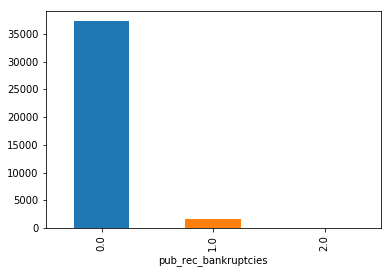

In [15]:
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count().plot.bar()

In [16]:
## checking the number of fully paid people with respect to their bankruptcies
temp[(temp.pub_rec_bankruptcies == 1) | (temp.pub_rec_bankruptcies == 2)].loan_status.value_counts()

Fully Paid     1274
Charged Off     368
Current          39
Name: loan_status, dtype: int64

In [17]:
## can 0 be replaced for NAs if they have fully paid the loans? Get the count of majority
temp[(temp.pub_rec_bankruptcies == 0)].loan_status.value_counts()

Fully Paid     31097
Charged Off     5141
Current         1101
Name: loan_status, dtype: int64

- We will now replace NAs where they have fully paid , with 0 bankrupties as we saw above that majority of them with 0 bankrupties have paid their loans
- We will drop the missing NAs in pub_rec_bankruptcies if they have been charged_off for their loans. This is because, we dont want to deal with such data as there are no evident proofs to impute right values in pub_rec_bankruptcies.

In [18]:
## Replace/Drop based on above assumptions
def replace_na_pub_rec_bankruptcies(x,y):
    if np.isnan(y):
        if x == "Fully Paid":
            return 0
        else:
            return y
    else:
        return y


df_temp = df

##replace values
df_temp["pub_rec_bankruptcies"] = df_temp.apply(lambda x: replace_na_pub_rec_bankruptcies(x.loan_status,x.pub_rec_bankruptcies),axis=1)
print(df_temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count())

##drop remaining
df_temp = df_temp[~df_temp.pub_rec_bankruptcies.isnull()]

df = df_temp


pub_rec_bankruptcies
0.0    37918
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [19]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
last_pymnt_d,0.179297
chargeoff_within_12_mths,0.128791
collections_12_mths_ex_med,0.128791
revol_util,0.126266
tax_liens,0.095962
title,0.027778
last_credit_pull_d,0.005051
total_rec_int,0.000000
total_acc,0.000000
initial_list_status,0.000000


In [20]:
 #Remove all the rows with missing last payment due
df = df[~df.last_pymnt_d.isnull()]

In [21]:
## types of values in chargeoff_within_12_mths 
df.chargeoff_within_12_mths.value_counts()

0.0    39477
Name: chargeoff_within_12_mths, dtype: int64

In [22]:
## types of values in chargeoff_within_12_mths 
df.collections_12_mths_ex_med.value_counts()

0.0    39477
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
#Dropping the above two column as it has only 0's 
df.drop(columns=["chargeoff_within_12_mths"],inplace=True)

C:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
df.drop(columns=["collections_12_mths_ex_med"],inplace=True)

C:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
charged_off = df[df.loan_status == "Charged Off" ]
current = df[df.loan_status == "Current"]
fully_paid = df[df.loan_status == "Fully Paid"]
print("Values in charged off: " , charged_off.revol_util.value_counts(),"\n")
print("Values in current: ", current.revol_util.value_counts(),"\n")
print("values in fully paid:" , fully_paid.revol_util.value_counts(),"\n")

Values in charged off:  0%        140
66.60%     17
63.70%     15
89.40%     15
73.40%     14
66.30%     14
45.10%     14
77.60%     14
89.90%     13
72.70%     13
66.70%     13
80.60%     13
71.70%     13
94.60%     12
81.60%     12
32%        12
80.30%     12
57.70%     12
72.40%     12
75.50%     12
89.50%     12
70.80%     12
57.40%     12
99%        11
59.60%     11
73.80%     11
82.60%     11
42%        11
76%        11
97.50%     11
         ... 
9.60%       1
24.89%      1
1.88%       1
6.20%       1
13.30%      1
31.90%      1
15.40%      1
24.40%      1
12.40%      1
77.63%      1
10.40%      1
16.80%      1
4.30%       1
25.40%      1
12.50%      1
8.60%       1
10.80%      1
17.20%      1
2.80%       1
8.46%       1
99.70%      1
30%         1
7.90%       1
6.90%       1
4.90%       1
6.30%       1
7.80%       1
2.10%       1
3.30%       1
5.50%       1
Name: revol_util, Length: 995, dtype: int64 

Values in current:  0%        23
73%        5
66.10%     5
88.20%     5
51.5

In [26]:
temp = df[~df.revol_util.isnull()]
temp.revol_util = temp.revol_util.apply(lambda x: float(x[:-1]))


C:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
temp.revol_util.describe()

count    39482.000000
mean        48.831837
std         28.330776
min          0.000000
25%         25.400000
50%         49.300000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

#### revol_util
- AS we see above that the std is very high , we cannot replace the nulls with median
- We can still replace the values with mean, but since its just 0.1% data we can choose drop those rows

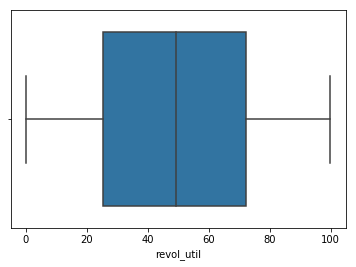

In [28]:
sns.boxplot(temp.revol_util)

In [29]:
##remove missing rows of revol_util
df = df[~df.revol_util.isnull()]

In [30]:
df.tax_liens.value_counts()

0.0    39444
Name: tax_liens, dtype: int64

- tax liens has only 0's and NAs, we can drop that column
- Title and last_credit_pull_d missing valued rows are dropped as they are around 0.1% and 0.05%

In [31]:
##drop tax_liens column
df.drop(columns=["tax_liens"],inplace=True)

## remove rows where title and last_credit_pull_d
df = df[~df.title.isnull()]
df = df[~df.last_credit_pull_d.isnull()]

In [32]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
id,0.0
inq_last_6mths,0.0
pub_rec,0.0
revol_bal,0.0
revol_util,0.0
total_acc,0.0
initial_list_status,0.0
out_prncp,0.0
out_prncp_inv,0.0
total_pymnt,0.0


In [33]:
#checking no. of value_counts for column
df.initial_list_status.value_counts()

f    39469
Name: initial_list_status, dtype: int64

In [34]:
#checking no. of value_counts for policy_code column
df.policy_code.value_counts()

1    39469
Name: policy_code, dtype: int64

In [35]:
#checking no. of value_counts for application_type column
df.application_type.value_counts()

INDIVIDUAL    39469
Name: application_type, dtype: int64

In [36]:
#checking no. of value_counts for acc_now_delinq column
df.acc_now_delinq.value_counts()

0    39469
Name: acc_now_delinq, dtype: int64

In [37]:
#checking no. of value_counts for delinq_amnt column
df.delinq_amnt.value_counts()

0    39469
Name: delinq_amnt, dtype: int64

In [38]:
#checking no. of value_counts for pymnt_plan column
df.pymnt_plan.value_counts()

n    39469
Name: pymnt_plan, dtype: int64

In [39]:
#lets find out co-relation between out_prncp and out_prncp_inv columns
df[['out_prncp','out_prncp_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 99% positive co-relation. So we can drop any one column

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999827
out_prncp_inv,0.999827,1.000000


In [40]:
#lets find out co-relation between total_pymnt and total_pymnt_inv columns
df[['total_pymnt','total_pymnt_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 97% positive co-relation. So we can drop any one column



,total_pymnt,total_pymnt_inv
total_pymnt,1.000000,0.971624
total_pymnt_inv,0.971624,1.000000


In [41]:
#lets find out co-relation between funded_amnt and funded_amnt_inv columns
df[['funded_amnt','funded_amnt_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 96% positive co-relation. So we can drop any one column

,funded_amnt,funded_amnt_inv
funded_amnt,1.000000,0.962914
funded_amnt_inv,0.962914,1.000000


#### list of columns to keep based on assumptions below
- id : loan_id
- pub_rec: We can analyze effect of loan status on derogatry public record.
- revol_bal: we can check credit effect on loan_defaulters
- revol_util: we can check whether deafulters behaviour toward credit utilization
- total_acc: we are expecting negative co-relation between defaulters and  total number of credit lines
- out_prncp : co-relation between out_prncp_inv and out_prncp is very high. So keeping out_prncp.
- total_pymnt : co-relation between total_pymnt_inv and total_pymnt is very high. So keeping total_pymnt.
- term : loans are given in two terms i.e. 3years or 5years. So, we can analyse effect of loan terms on defaulters
- int_rate : it is key factor in any loans purchase.
- installment : it is also key factor in any loan process
- total_rec_prncp : it is also key factor in any loan process
- total_rec_int : it is also key factor in any loan process
- total_rec_late_fee : it is also known key factor in any loan process
- last_pymnt_d : we can derive another column using issue_d and last_pymnt_d to get probable time period of defaulting 
- issue_d : important for above requirement
- open_acc : to check if credit lines are affecting default rate
- earliest_cr_line : We can find how quick a person is to default after he is given a credit line
- delinq_2yrs : We can see behaviour of a defaulter in the last two years over his alloted credit  
- loan_amnt: Main criteria to decide the defaulting rate
- funded_amnt : amount of loan amount committed when approved at that time. Can check loan_amount v/s funded amount
- grade: We can check the relation between level of loan given and the defaulting behaviour
- sub_grade: We can check the relation between subgrade of LC and the defaulting behaviour. And also which subgrades within a grade are more susciptable for defaulting
- emp_length : Will help in work experience v/s defaulting comparision
- home_ownership: The home ownership usually gives confidence to get a loan. Good metric for comparision
- annual_inc : Good metric to evaluate on this front.
- verification_status : income verification plays a key role in defaulting behaviour usually.
- loan_status: A kind of target variable for this EDA
- purpose: good metric to see the reason of loan and eventual defaulting behavior if any.
- state: origin state behaviour on defaulting can be checked
- dti - debt to income is a ratio if more , chances of defaulting are more. But we will indulge later based on data for this.
- pub_rec_bankruptcies: relation between this and defaulting is an intersting insight.

#### list of columns to drop
- inq_last_6mths : Since person's enquiry process is what we are not concerned about.
- initial_list_status : There is only one value in entire column.
- out_prncp_inv : co-relation between out_prncp_inv and out_prncp is very high. So dropping out_prncp_inv.
- total_pymnt_inv : co-relation between total_pymnt_inv and total_pymnt is very high. So dropping total_pymnt_inv
- recoveries : since this is post loan application process, we are not concerned about it.
- collection_recovery_fee : this column values amount to recovery fees required for collection through third party agencies or any other means. So, we can ignore this column as it is post charge off process.
- last_pymnt_amnt: As this amount refers to last month's payment, no insight can be drawn from this column. It is better to drop it.
- last_credit_pull_d : This colum values are last month's credit line pulled for this loan. So, not much meaningful insight can be drawn from it.
- policy_code : There is only one value throught column. Hence we can drop it.
- application_type : There is only one value throught column. Hence we can drop it. 
- acc_now_delinq : There is only one value throught column. Hence we can drop it.
- delinq_amnt : There is only one value throught column. Hence we can drop it.
- member_id: we can eliminate, just keeping id is enough because both were unique
- funded_amnt_inv : co-relation between funded_amnt_inv and funded_amnt is very high. So dropping funded_amnt_inv
- pymnt_plan: There is only one value throught column. Hence we can drop it.
- url: We can remove this as its the url of the loan which looks like https://lendingclub.com/browse/loanDetail.action?loan_id=1077501 and we are anyways keeping the id column.
- title: we can ignore this column, as we are looking at purpose column. Going indepth for this column requires more processing like clustering etc..
- zip_code :  Doesn't have significant value to decide defaulter behaviour based on his origin place, doing on state level is better
 
    ["inq_last_6mths", "initial_list_status" , "out_prncp_inv" , "total_pymnt_inv" , "recoveries", "collection_recovery_fee" ,"last_pymnt_amnt", "last_credit_pull_d" , "policy_code" , "application_type","member_id","funded_amnt_inv","pymnt_plan","url","title","zip_code","acc_now_delinq","delinq_amnt"]

In [42]:
df = df.drop(columns = ["inq_last_6mths", "initial_list_status" , "out_prncp_inv" , "total_pymnt_inv" , "recoveries", "collection_recovery_fee" ,"last_pymnt_amnt", "last_credit_pull_d" , "policy_code" , "application_type","member_id","funded_amnt_inv","pymnt_plan","url","title","zip_code","acc_now_delinq","delinq_amnt"])

In [43]:
after_dropping = df.shape
after_dropping

(39469, 31)

In [44]:
print("Number of rows dropped: " + str(shape[0] - after_dropping[0]) + "(" + str((shape[0] - after_dropping[0])*100/shape[0]) + "%)")
print("Number of columns dropped: " + str(shape[1] - after_dropping[1]) + "(" + str((shape[1] - after_dropping[1])*100/shape[1]) + "%)")


Number of rows dropped: 248(0.6244177556210188%)
Number of columns dropped: 80(72.07207207207207%)


In [45]:
## saving the cleaned data to a csv for faster reading in future
df.to_csv("Data/loan_cleaned.csv")
df = pd.read_csv("Data/loan_cleaned.csv")

# 2. UniVariate Analysis

### i) loan_status

In [46]:
## Checking loan_status variable
df.loan_status.describe()

count          39469
unique             3
top       Fully Paid
freq           32906
Name: loan_status, dtype: object

In [64]:
##get percentage of loans which are defaulted
loan_status_perc = (100*(df.loan_status.value_counts())/df.shape[0]).to_frame()
loan_status_perc.reset_index(inplace=True)
loan_status_perc

,index,loan_status
0,Fully Paid,83.371760
1,Charged Off,13.739897
2,Current,2.888343


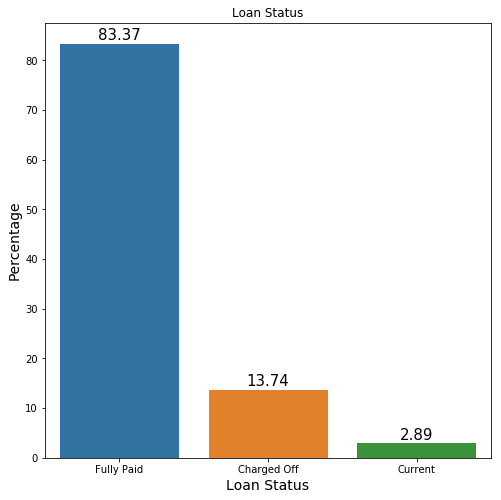

In [67]:
# Defining the plot size
plt.figure(figsize=(8,8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="index", y="loan_status", data=loan_status_perc)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Loan Status", size=14)
  
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
  
# Setting the title for the graph
plt.title("Loan Status")
  
# Fianlly showing the plot
plt.show()


Loan Status:
- We see that only 13.7% of the given data points/members have been charged off

### ii) loan_amnt

In [71]:
#check datatype
df.loan_amnt.dtype

dtype('int64')

In [74]:
df.loan_amnt.describe()

count    39469.000000
mean     11228.972738
std       7455.425065
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

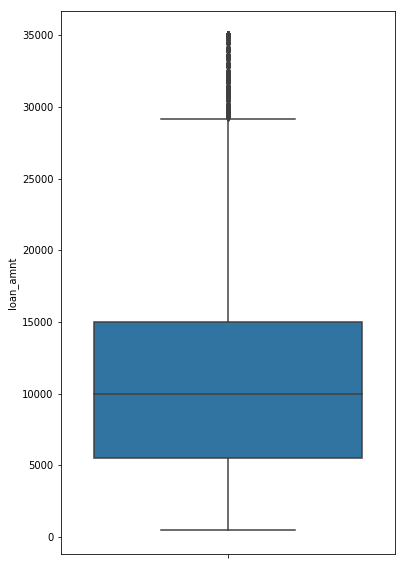

In [80]:
## draw a box  plot of loan_amount
plt.figure(figsize=(6,10))
sns.boxplot(data=df,y = "loan_amnt")

C:\Users\Sameer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sameer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


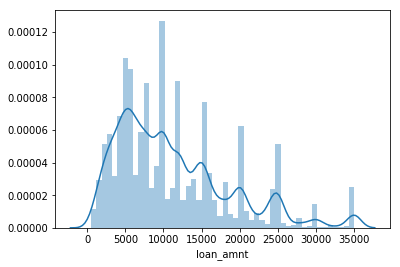

In [84]:
sns.distplot(df.loan_amnt)

- avg loan_amount is 11,200
- std deviation doesn't matter, because loan amounts differ based on requirements. 
- Most of the loans are ranging in between 5500 to 15000
- Its left skewed as post 15000 the number of loans is decreasing and the max value is 35000

### iii) funded_amnt

In [88]:
#check datatype
df.funded_amnt.dtype

dtype('int64')

In [89]:
df.funded_amnt.describe()

count    39469.000000
mean     10956.396159
std       7184.746851
min        500.000000
25%       5400.000000
50%       9650.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

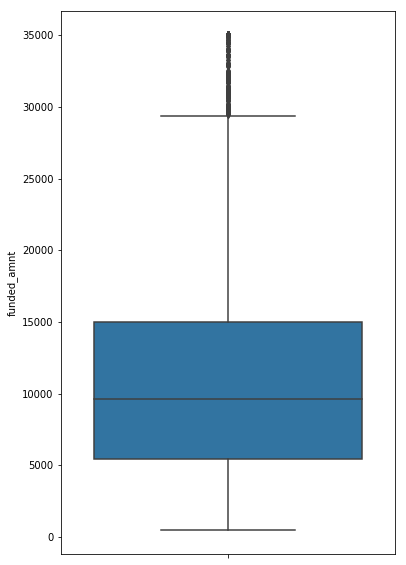

In [90]:
## draw a box  plot of loan_amount
plt.figure(figsize=(6,10))
sns.boxplot(data=df,y = "funded_amnt")

C:\Users\Sameer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sameer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


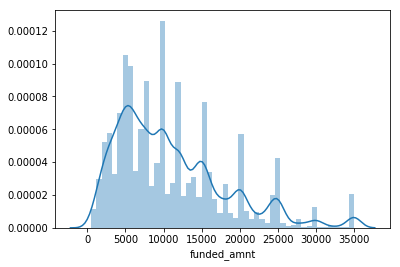

In [91]:
sns.distplot(df.funded_amnt)

- We see similar behaviour as loan_amount because they are highly correlated in terms of commited loan v/s amount disbursed as usually close.

### iv) int_rate

In [98]:
##check the type of value for int_rate
df.dtypes['int_rate']

dtype('O')

In [101]:
##convert to float
df.int_rate = df.int_rate.apply(lambda x : float(x[:-1]))

In [102]:
##check the stats 
df.int_rate.describe()

count    39469.000000
mean        12.014381
std          3.728017
min          5.420000
25%          9.200000
50%         11.830000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

C:\Users\Sameer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sameer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


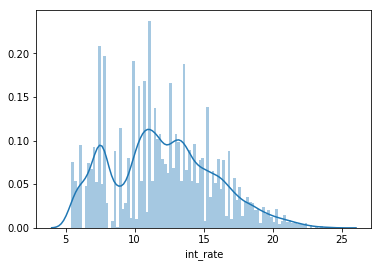

In [105]:
sns.distplot(df.int_rate,bins=100)

- We see that mean rate is around 12% 
- We see more of a near to normal distribution of rates , which might be based on other factors like reason, amount_loan,policy of company etc..
- Most of the loans in IQR are between 9% - 14.5% which is generally seen in most of the real life loans.
- 50% loans are within 5% of interest ranging 9 - 14

### v) term

In [107]:
tenure = df.term.value_counts().to_frame()
tenure

,term
36 months,28872
60 months,10597


In [109]:
##get percentage of loans which are defaulted
tenure_perc = (100*(df.term.value_counts())/df.shape[0]).to_frame()
tenure_perc.reset_index(inplace=True)
tenure_perc

,index,term
0,36 months,73.151081
1,60 months,26.848919


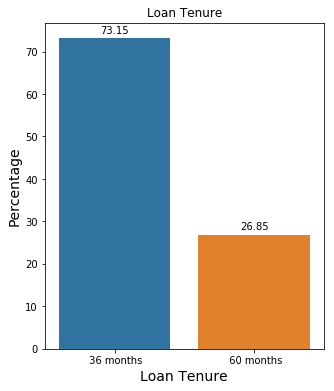

In [113]:
# Defining the plot size
plt.figure(figsize=(5,6))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="index", y="term", data=tenure_perc)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Loan Tenure", size=14)
  
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
  
# Setting the title for the graph
plt.title("Loan Tenure")
  
# Fianlly showing the plot
plt.show()


- Only two tenures being taken , either 3yrs or 5yrs
- We see that 74% approx. are taking loans for 3 years and 26% of them for 5 years